**About this project:**

The dataset (E-commerce cosmetic dataset) was chosen because we are both business experts in buying cosmetics online and are familiar with all its features. The dataset also meets the project's requirements with over 10K rows and 15 columns.
We had an opening session in which we chose the dataset and set our main business question. Following this, we had a few more working sessions to progress on the project.

This is how we splited the tasks between us:
  
*   What is our data base about. How can it help to gain profit, what are the problems, what did we test, reading litreture review and what we found / Or
*   Import the data
*   Overall look (shape, info, describe)
*   Clean the data:
      *Show columns with missing data, rating column type change / Gil  
*   Statitics:
*    2-3 descriptive graphs (histograms etc.) /Or
*    Finding outliers /Gil
*    Investigating the tendency between 2 features (2-3 graphs that display columns tendency with number of ratrings) / Gil
*    Exploring the correlation between price and number of ratings /Or

**Here is a link to our database:**
https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop





---





This database deals with e-commerce products from different websites for Indian customers. Each row represents a product.
**Our main business question** is how the price of a product influences the number of ratings for that particular product. This is important for website managers and product suppliers to know because a lower number of ratings overall can reduce the attractiveness and perceived validation of the product by new buyers, affecting their decision to purchase the product (Baymard Institute 2024). Hence,  we predict that lower-priced products will have a higher number of ratings and vice versa. Yet, other factors are in play as well and produt category is also important for rating (Lindgren 2021).

**Procedure**
To investigate how pricing influences the number of ratings, we first familiarized ourselves with the main variables, types, number of observations for each variable, sample size and outliers. We also consider the tendency of the product brand and the category of the cosmetic solution (e.g., face, body, eyes, etc.) on the number of ratings. We then cleaned the data by handling missing values. We applied descriptive statistics to all variables of interest, in tables and graphs. Finally, we calculated the correlation between the variables of interest.

Our **main findings** show that most bought products are low-priced and have a small number of ratings (less than 100 voters). In addition, most products that received a relatively high number of ratings are face and body products associated with the Maybelline, Lakmi and Swiss Beauty, REVLON and Clinique brands.

Finally, we found a weak and statistically significant negative correlation between price and the number of ratings, which aligns with the literature review. However, the small effect size suggests that other variables have a stronger effect on the number of ratings. Further investigation should apply multiple regression to investigate the relative effect size of other variables that influence the number of ratings, such as brand and category.

**import the data**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cosmetic_dataset = pd.read_csv('E-commerce  cosmetic dataset.csv', encoding='latin-1')
df = pd.DataFrame(cosmetic_dataset)
df.head()

,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
0,"Carlton London Incense Eau da parfum, Premium ...",Flipkart,India,body,perfume,https://www.amazon.in/Carlton-London-Limited-I...,599.0,Carlton London,NaN,aerosol,NaN,"Top Note: Orange Blossom, Blackberry | Heart N...",100,3.9,19
1,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,149.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,031"
2,CHARLENE SPRAY MIST PERFUME 30 - INTIMATE (PAC...,Flipkart,India,body,perfume,https://www.amazon.in/CHARLENE-SPRAY-MIST-PERF...,298.0,Charlene,NaN,aerosol,NaN,Unit count type:,30,4.4,"4,072"
3,DENVER Black Code Perfume - 60 | Eau de Parfum...,Flipkart,India,body,perfume,https://www.amazon.in/DENVER-Black-Code-Perfum...,245.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,60,4.2,61
4,Denver Hamilton Perfume - 100 | Long Lasting P...,Flipkart,India,body,perfume,https://www.amazon.in/Denver-Perfume-Hamilton-...,422.0,Denver,NaN,aerosol,NaN,Long-Lasting Scent,100,4.3,342


**overall look**



In [ ]:
print("Shape of the data frame:")
print(df.info())
print("________________")
print("number of unique products:")
print(len(df['product_name'].unique()))
print("________________")
print("number of unique products:")
print(df.describe())
print("________________")
print(df.dtypes)
print("________________")


Shape of the data frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12615 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12615 non-null  object 
 1   website       12615 non-null  object 
 2   country       12615 non-null  object 
 3   category      12615 non-null  object 
 4   subcategory   12615 non-null  object 
 5   title-href    12615 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12615 non-null  object 
 8   ingredients   6600 non-null   object 
 9   form          12615 non-null  object 
 10  type          9934 non-null   object 
 11  color         10626 non-null  object 
 12  size          9449 non-null   object 
 13  rating        10548 non-null  object 
 14  noofratings   12156 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.4+ MB
None
________________
number of unique products:
11341
________________
number of 

**Clean the data:**<br>
1. show columns with missing data


In [ ]:
print(df.isnull().any())
print("____________")
nan_count = df.isna().sum()
print(nan_count)

product_name    False
website         False
country         False
category        False
subcategory     False
title-href      False
price            True
brand           False
ingredients      True
form            False
type             True
color            True
size             True
rating           True
noofratings      True
dtype: bool
____________
product_name       0
website            0
country            0
category           0
subcategory        0
title-href         0
price            317
brand              0
ingredients     6015
form               0
type            2681
color           1989
size            3166
rating          2067
noofratings      459
dtype: int64


2. price and noofrating both have missing data.  Is there a correlation between price Nan and noofrating Nan?

  answer below: No. there is no significant number of Nans instances in price that are also Nan in noofratings

In [ ]:
df.isnull().groupby(['price','noofratings']).size()


price  noofratings
False  False          11871
       True             427
True   False            285
       True              32
dtype: int64

3. We decided to drop all price column NaN instances, since it is only about 3% from the data, and Nan price has no meaning in our business question.

In [ ]:
df = df.dropna(subset="price")
df.isna().sum()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12298 entries, 0 to 12614
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  12298 non-null  object 
 1   website       12298 non-null  object 
 2   country       12298 non-null  object 
 3   category      12298 non-null  object 
 4   subcategory   12298 non-null  object 
 5   title-href    12298 non-null  object 
 6   price         12298 non-null  float64
 7   brand         12298 non-null  object 
 8   ingredients   6594 non-null   object 
 9   form          12298 non-null  object 
 10  type          9660 non-null   object 
 11  color         10330 non-null  object 
 12  size          9230 non-null   object 
 13  rating        10394 non-null  object 
 14  noofratings   11871 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.5+ MB


4. In order to check for correlation we changed "noofrating" column type from object to float64:

In [ ]:
df['noofratings'] = df['noofratings'].str.replace(r',', '') #take out "," if number of ratings is writen as "#,###"
df['noofratings'] = pd.to_numeric(df['noofratings'], errors='coerce')#change column to numeric
df['noofratings'] = df['noofratings'].fillna(0) #replace Nan values with 0

df['noofratings'] = df['noofratings'].astype(float)
df['noofratings'].info()


<class 'pandas.core.series.Series'>
Index: 12298 entries, 0 to 12614
Series name: noofratings
Non-Null Count  Dtype  
--------------  -----  
12298 non-null  float64
dtypes: float64(1)
memory usage: 192.2 KB


**2-3 descriptive graphs (histograms etc.)**

In [ ]:
#descriptive statistics of main varibles:
print(df[['price', 'noofratings']].describe().round(2))

          price  noofratings
count  12298.00     12298.00
mean    2281.18       943.74
std     3158.69      6516.32
min        1.70         0.00
25%      499.00         5.00
50%     1307.20        24.00
75%     2859.50       246.00
max    94099.00    220040.00


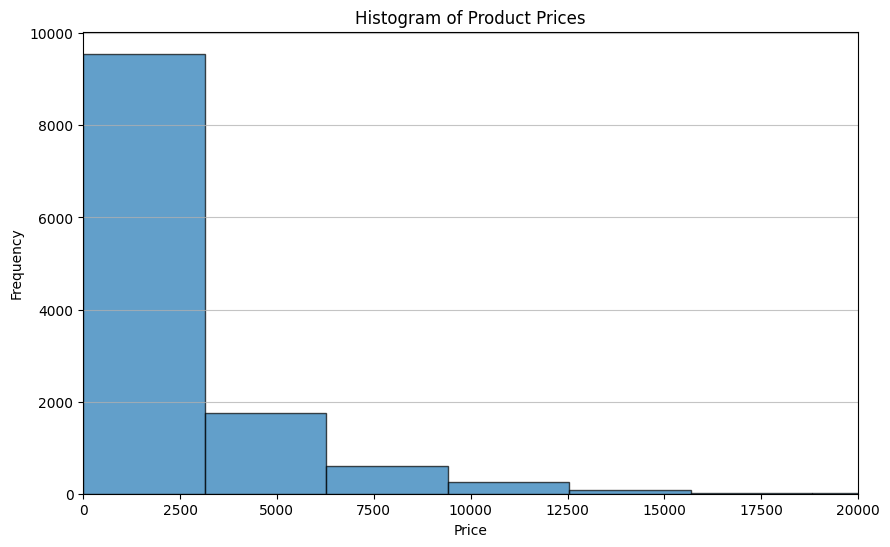

In [ ]:
# Plot a histogram for the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xlim(0, 20000) # here we limit the x axis size
plt.show()


#We can see here that most obs are lower priced products.

<function matplotlib.pyplot.show(close=None, block=None)>

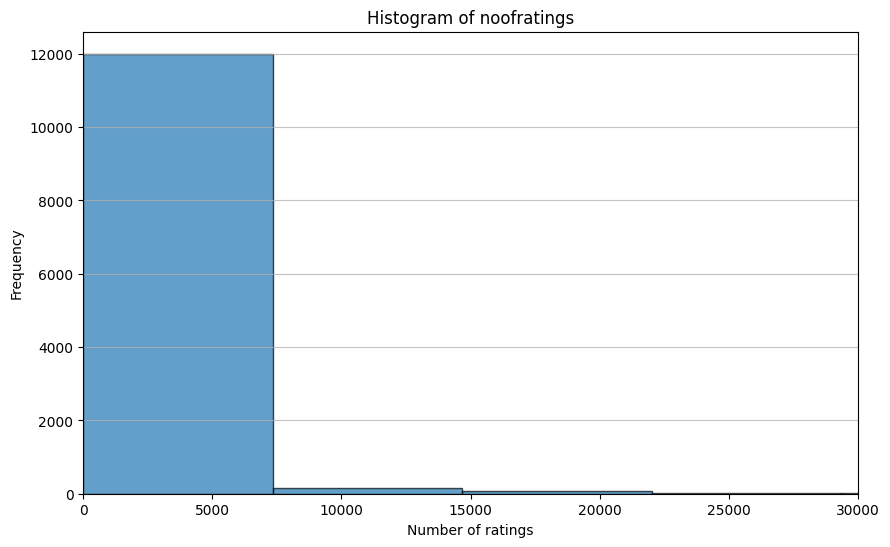

In [ ]:
# Plot a histogram for the 'noofratings' column
plt.figure(figsize=(10, 6))
plt.hist(df['noofratings'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of noofratings')
plt.xlabel('Number of ratings')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xlim(0, 30000)   # here we limit the x axis size
plt.show


#We can see here that most obs have low number of ratings.

In [ ]:
df2=df.groupby('price')['noofratings'].mean()
df2.head()

price
1.70       0.0
3.50     152.0
6.97       1.0
15.98      0.0
17.00      0.0
Name: noofratings, dtype: float64

**finding outliers**


1. boxplot for columns of interest

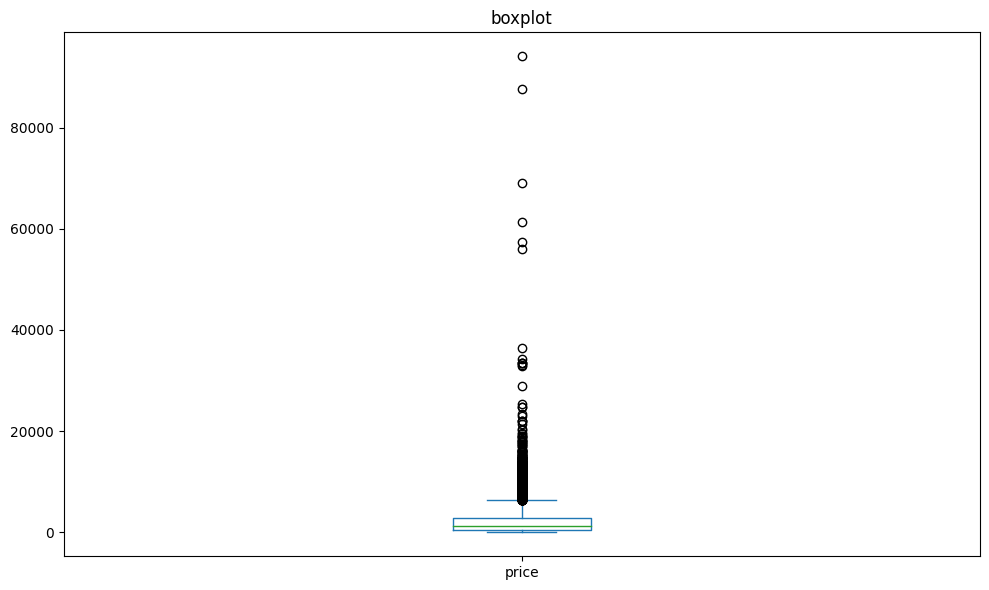

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True

# Pandas dataframe
data_price = pd.DataFrame( df['price'])
data_noofratings = pd.DataFrame( df['noofratings'])
# Plot the dataframe
ax = data_price[['price']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()

#There are 6 instances above 40,000 we should examin. #Outliers can be remove.

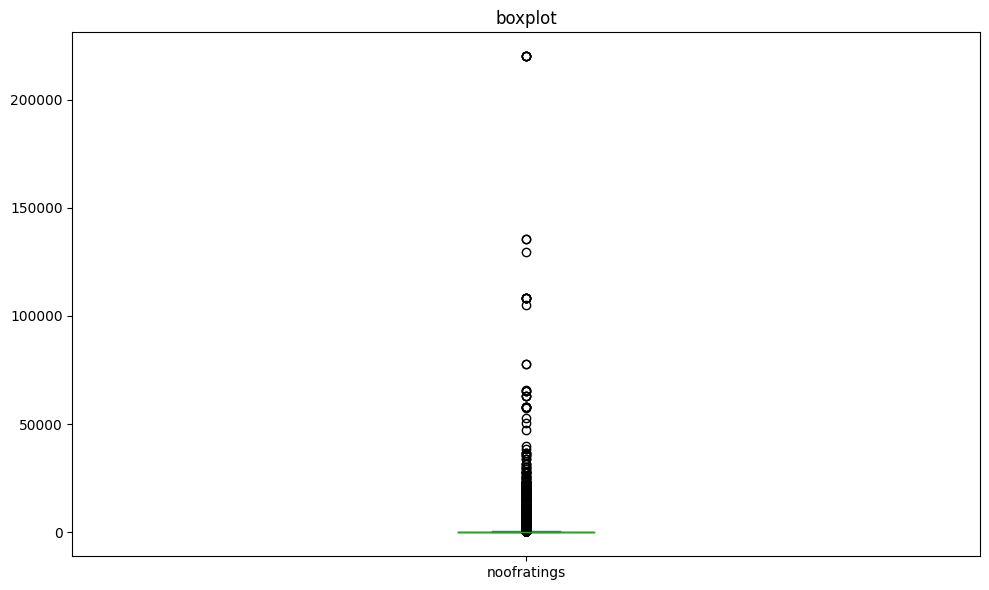

In [ ]:
ax = data_noofratings[['noofratings']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()
# There are several instances above 5,000 we should examin.

2.compare the mean to the outliars and ask a business expert if the difference makes sense.
<br>
**as business experts we identify that in rows 3536 and 8420 the price is a mistake and should be deleted, however, in rows  892, 893, 11156 prices are true, and though are verry high, are important part of the data, so we cannot delete outliars automatically**

In [ ]:
print(df['price'].mean())
df[df['price'] > 40000]



2281.1809351114002


,product_name,website,country,category,subcategory,title-href,price,brand,ingredients,form,type,color,size,rating,noofratings
892,Clive Christian X Perfume Spray 30/1oz,Flipkart,India,body,perfume,https://www.amazon.in/Clive-Christian-Perfume-...,61400.00,Clive Christian,NaN,liquid,NaN,"A sexy, modern, luxury fragrance in a handmade...",30,4.3,126.0
893,Clive Christian X Perfume Spray 100/3.4oz,Flipkart,India,body,perfume,https://www.amazon.in/Clive-Christian-Perfume-...,94099.00,Clive Christian,NaN,liquid,NaN,X ' Perfume Spray - 100/3.4oz,100,4.4,1186.0
3536,"Revlon ColorStay Eyeliner Pencil, Black [201],...",Amazon,India,eyes,eyeliner,https://www.amazon.in/Revlon-ColorStay-Eyeline...,57289.29,REVLON,NaN,liquid,NaN,NaN,NaN,4.7,4.0
5123,Mamaearth Anti Dandruff Tea Tree Hair Mask wit...,Amazon,India,hair,hairmask,https://www.amazon.in/Mamaearth-Dandruff-Danrd...,55999.00,Mamaearth,NaN,cream,normal,No color,200,NaN,0.0
8420,Laneige Lip Glowy Balm_Berry 10g,Amazon,India,lips,lipbalm,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...,69000.00,LANEIGE,NaN,stick,normal,NaN,10 s,4.4,418.0
11156,La Prairie Skin Caviar Concealer Foundation SP...,Amazon,India,face,foundation,https://www.amazon.in/Prairie-Caviar-Concealer...,87666.00,La Prairie,NaN,liquid,Full,Crï¿½ï¿½ï¿½ï¿½ï,NaN,4.20,0.0


**Number of ratings tendency in the data:** <br>

 1. Number of ratings over category and subcategory

category  subcategory  
body      bodywash          130.818030
          moisturizer        71.000000
          perfume          2001.684211
          soap             4949.226545
          sunscreen         252.466667
eyes      eye primer        677.785714
          eyebrow           329.037915
          eyelashes         165.500000
          eyeliner         1067.309339
          eyeshadow         234.522779
          mascara           323.135703
          primer           1445.140741
          serum             315.875000
face      blush              41.041667
          concealer          58.890653
          eye treatment    4528.200000
          face oil           26.187500
          foundation        602.497561
          highlighter        37.444444
          powder           1145.511628
          primer             52.230769
hair      conditioner        26.405405
          dry shampoo       948.704545
          hairmask            0.000000
          hairstyling        38.033333
 

<ipython-input-15-c392fbd34347>:7: FutureWarning: The provided callable <function mean at 0x7f7ab2d5fd00> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = pd.pivot_table(


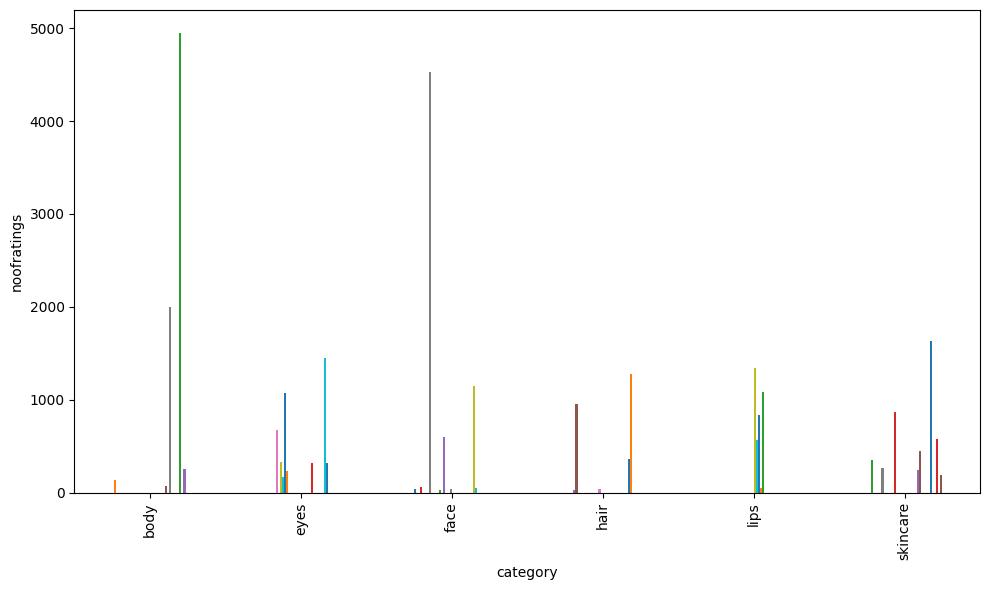

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Category = df.groupby(['category', 'subcategory'])['noofratings'].mean()
print(Category)
df_bar = df[['category', 'subcategory', 'noofratings']]
df_pivot = pd.pivot_table(
     df_bar,
     values='noofratings',
     index='category',
     columns='subcategory',
     aggfunc=np.mean
)
ax = df_pivot.plot(kind="bar", legend=False, figsize=(10, 6))
ax.set_ylabel("noofratings")
plt.show()               #Highest number of ratings are for body and face (specifically for soap and eye treatment).

2. number of ratings over brand
<br>
*there are 1753 unique brands, we looked only at brands with over 50 different products

In [ ]:
# print(len(df['brand'].unique())) #1753 unique brands
df = df[['brand', 'noofratings']]
brandlist_50 = df.brand.value_counts()[df.brand.value_counts()>50] #list of brands with over 50 different products
# print(brandlist_50)
df2 = df.groupby(['brand' ,'noofratings'], as_index=False).mean()#group brands by price mean but keep brands as column name
#print(df2)
df['brand'].map(df.groupby('brand')['noofratings'].mean())
print(df)
df3 = df2[df2['brand'].isin([brandlist_50])].sort_values(by=['noofratings'], ascending=False)#select only brands that have over 50 different products

print(df3)
#ax = df3.plot.bar(x='brand', y='noofratings')



                 brand  noofratings
0       Carlton London         19.0
1             Charlene       4031.0
2             Charlene       4072.0
3               Denver         61.0
4               Denver        342.0
...                ...          ...
12610    MAC Cosmetics         14.0
12611    MAC Cosmetics         13.0
12612  Klara Cosmetics         96.0
12613         CLINIQUE         15.0
12614           Lancme         16.0

[12298 rows x 2 columns]
Empty DataFrame
Columns: [brand, noofratings]
Index: []


1710
                        brand  noofratings
988                Maybelline  5333.862745
829                   LAKMï¿½  2213.548387
1372             SWISS BEAUTY  1013.756757
1270                   REVLON   832.957746
309                  Clinique   705.598131
1001                   Milani   611.633333
270                 COVERGIRL   573.168142
409                      Dior   359.692308
576                   Generic   297.510638
976             Mario Badescu   268.087500
1183                 Pacifica   254.803030
1031                  MyGlamm   234.493333
1548   ULTA Beauty Collection   201.155172
185         Benefit Cosmetics   169.790909
74    Anastasia Beverly Hills   154.741497
1532                Too Faced   134.893333
583                  Givenchy   127.537634
1063                      NYX   118.722222
919                      MARS   111.212121
1427                 Smashbox    86.487805
823                  L.A GIRL    73.164179
906             MAC Cosmetics    26.067797
251   

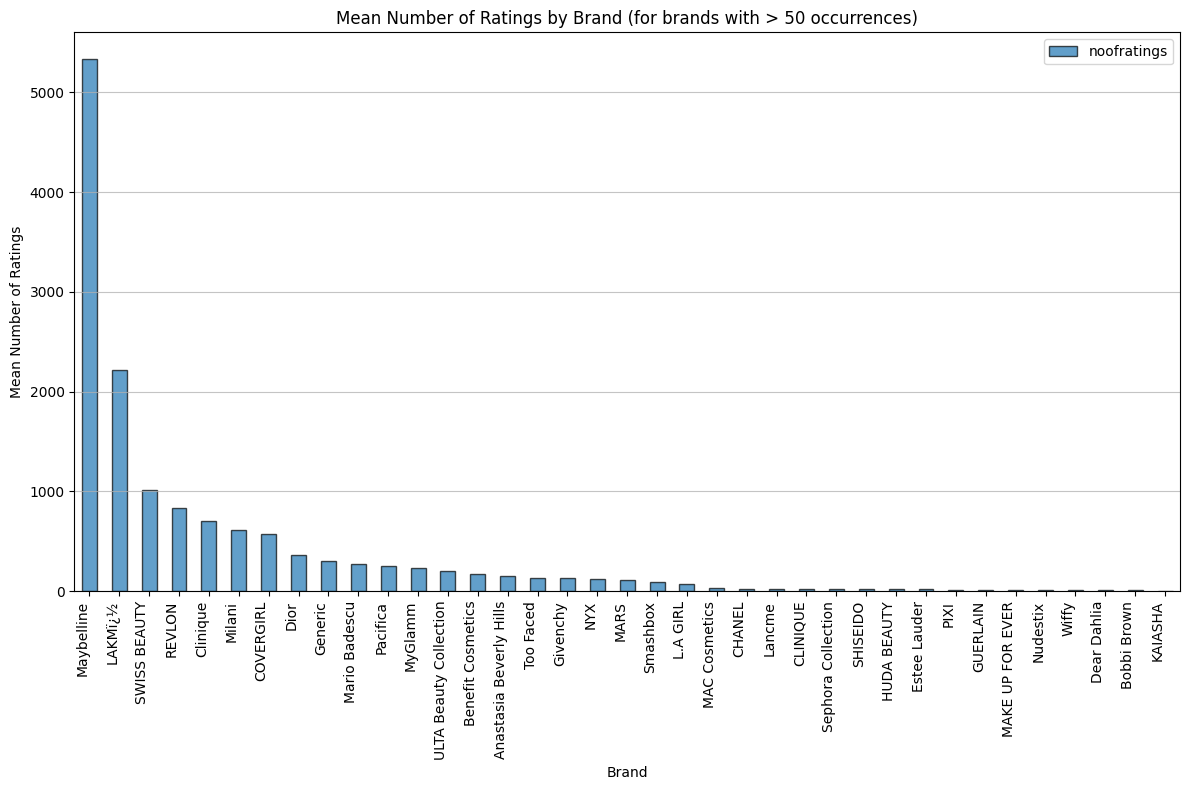

In [ ]:
#TRY THIS

# Print the number of unique brands
print(len(df['brand'].unique()))  # Example output: 1753 unique brands

# Select only the relevant columns
df = df[['brand', 'noofratings']]

# List of brands with over 50 occurrences
brand_counts = df['brand'].value_counts()
brandlist_50 = brand_counts[brand_counts > 50].index.tolist()  # List of brands with more than 50 occurrences

# Group by brand and calculate the mean number of ratings
df2 = df.groupby(['brand'], as_index=False).mean()

# Select only brands that have over 50 occurrences
df3 = df2[df2['brand'].isin(brandlist_50)].sort_values(by=['noofratings'], ascending=False)

# Print the resulting DataFrame
print(df3)

# Plot a bar chart for the filtered brands
ax = df3.plot.bar(x='brand', y='noofratings', figsize=(12, 8), edgecolor='black', alpha=0.7)
plt.xlabel('Brand')
plt.ylabel('Mean Number of Ratings')
plt.title('Mean Number of Ratings by Brand (for brands with > 50 occurrences)')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.75)
plt.show()    #Highest rank products: Maybelline, Lakmi and Swiss Beauty, REVLON and Clinique brands.

**Focuse on the distribution between number of ratings and price**

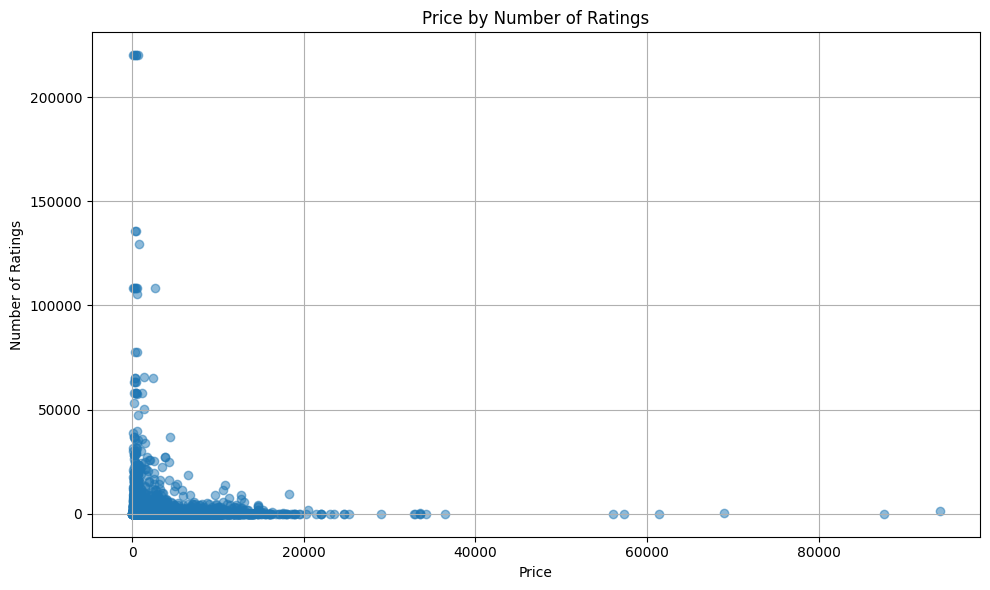

In [ ]:

# Scatter plot for the tendency between price and number of ratings.
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['noofratings'], alpha=0.5)
plt.title('Price by Number of Ratings')
plt.xlabel('Price')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['price'], df['noofratings'])

correlation   #The Pearson correlation coefficient of -0.0439 indicates a very weak negative correlation between price and the number of ratings. As the price increases, the number of ratings for the product decreases,
              #yet the effect is very small. This means that, on one hand, the findings align with past research and logic. Since the majority of consumers cannot afford to purchase high-priced products, they are more likely to rate lower-priced products.
              #On the other hand, we did not explore the mean ratings of the products, so we do not know if the ratings are low, average, or high. This mainly suggests that other variables may explain the number of ratings.

-0.04396141491554985

In [ ]:
p_value #The correlation is statistically significant since p=0.000

1.0769915118713962e-06